<a href="https://colab.research.google.com/github/luan640/regression_sales/blob/main/MODELO_PROPHET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
modelo_carreta = 'CBH'

#Código

In [2]:
#pip install fbprophet

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from prophet import Prophet
from pandas import to_datetime
from fbprophet import Prophet
from matplotlib import pyplot


In [4]:
arquivo = '/content/BASE VENDAS ATUALIZADA.xlsx'

df = pd.read_excel(arquivo) #, parse_dates=['ds'])
df['MOD08'].unique()

#selecionando modelo de carreta

selecao = (df.MOD08 == modelo_carreta)
df1 = df[selecao]
df1['ds'] =  pd.to_datetime(df1['ds'], infer_datetime_format=True)

#deixando apenas colunas necessárias

df1 = df1[['ds','y']]
df1 = df1.sort_values(by='ds')

df1 = df1.set_index('ds')
df1 = df1.resample('M').sum()
df1 = df1.reset_index()

x = pd.date_range(start = '2017-01-01', end = '2023-01-01', freq = 'm')
x = pd.DataFrame(x)
x = x.rename(columns={0: 'ds'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [5]:
df1

,ds,y
0,2017-02-28,1
1,2017-03-31,2
2,2017-04-30,11
3,2017-05-31,30
4,2017-06-30,101
...,...,...
59,2022-01-31,73
60,2022-02-28,26
61,2022-03-31,58
62,2022-04-30,59


In [6]:
model = Prophet()
# fit the model
model.fit(df1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds       yhat  yhat_lower  yhat_upper
0 2017-01-31   4.443642  -26.551682   31.705282
1 2017-02-28  -3.014814  -32.296241   26.619247
2 2017-03-31  17.001885  -15.359653   46.292747
3 2017-04-30   0.203591  -31.157439   33.414135
4 2017-05-31  31.736353    3.153842   62.435905


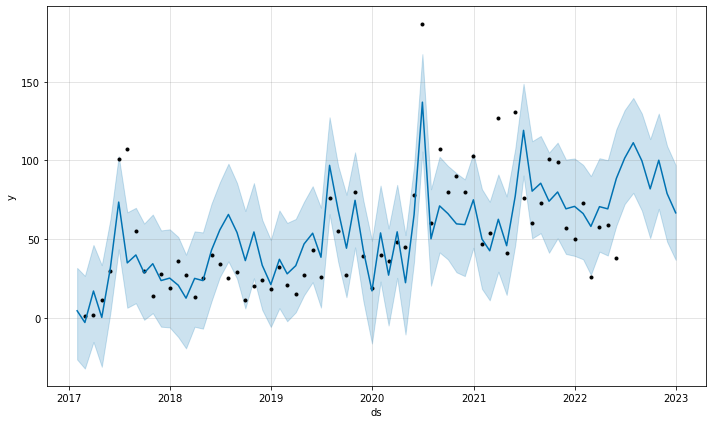

In [7]:
forecast = model.predict(x)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

          ds       yhat  yhat_lower  yhat_upper
0 2017-01-31   4.443642  -26.673311   34.363565
1 2017-02-28  -3.014814  -31.226485   29.195783
2 2017-03-31  17.001885  -13.481919   49.979642
3 2017-04-30   0.203591  -30.286517   28.903591
4 2017-05-31  31.736353    1.184495   61.140819


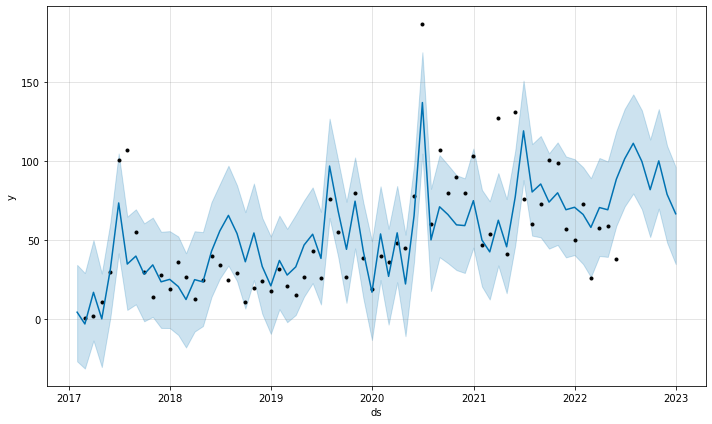

In [8]:
forecast = model.predict(x)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
arma_rmse = np.sqrt(mean_squared_error(df1['y'],forecast['yhat'][:len(df1)]))

In [11]:
arma_rmse

34.95440039451783

In [12]:
valor = df1['y']

Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

selecao = (valor >= limite_inferior) & (valor <= limite_superior)
df1 = df1[selecao]

df1 = df1.reset_index(drop=True)

In [13]:
model = Prophet()
# fit the model
model.fit(df1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds       yhat  yhat_lower  yhat_upper
0 2017-01-31   3.768240  -25.252713   34.179062
1 2017-02-28  -1.558422  -31.541990   26.257856
2 2017-03-31  19.597754   -8.726448   48.154224
3 2017-04-30   3.769706  -25.424182   33.032459
4 2017-05-31  35.839525    8.499933   64.304646


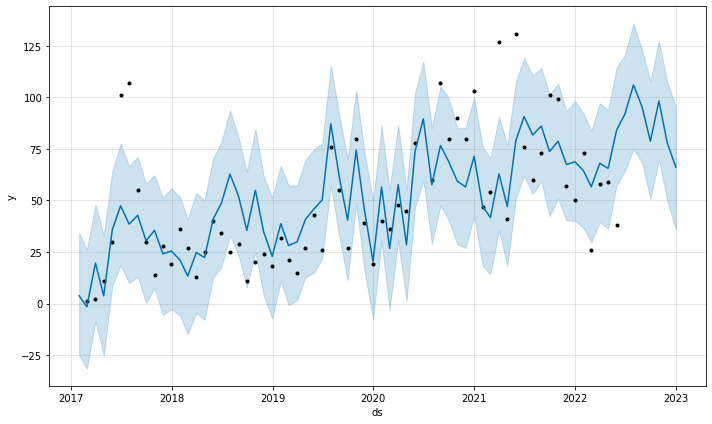

In [14]:
forecast = model.predict(x)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

In [15]:
arma_rmse = np.sqrt(mean_squared_error(df1['y'],forecast['yhat'][:len(df1)]))

In [16]:
arma_rmse

27.189422288551743

In [17]:
import plotly.graph_objects as go
fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=df1.ds,
                         y=df1.y.values,
                         name='Valores reais',
                         line_color='black', mode='lines+markers'))

fig4.add_trace(go.Scatter(x=forecast['ds'],
                         y=forecast['yhat'],
                         name='Valores previsto',
                         line_color='green', mode='lines+markers'))

#Gráfico final

In [18]:
fig4